In [40]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from pylab import *

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [42]:
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
feature_name=X_train.columns
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(85751, 8)
(85751, 1)
(36751, 8)


# Preprocess data

將data做**normalization**

並查看每個feature的分佈

In [43]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# print(X_train[:5])
# print(X_train.shape)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)
# print(X_test[:5])
# print(X_test.shape)

<AxesSubplot: ylabel='Density'>

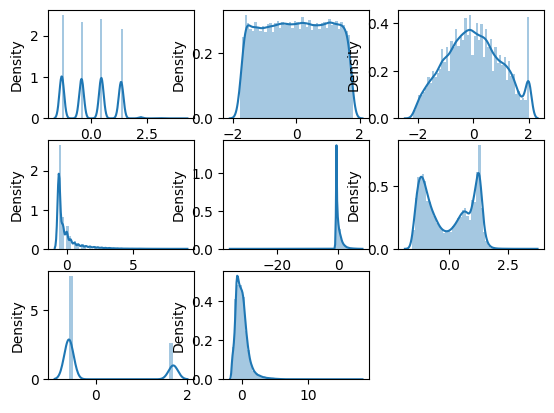

In [44]:
plt.subplot(3,3,1)
sns.distplot(X_train[:,0])
plt.subplot(3,3,2)
sns.distplot(X_train[:,1])
plt.subplot(3,3,3)
sns.distplot(X_train[:,2])
plt.subplot(3,3,4)
sns.distplot(X_train[:,3])
plt.subplot(3,3,5)
sns.distplot(X_train[:,4])
plt.subplot(3,3,6)
sns.distplot(X_train[:,5])
plt.subplot(3,3,7)
sns.distplot(X_train[:,6])
plt.subplot(3,3,8)
sns.distplot(X_train[:,7])

# Split training data

我將原本的training data分出3成為validation data

並以validataion data作為**評估model的依據**

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=18)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(60025, 8) (25726, 8)
(60025, 1) (25726, 1)


# RandomForest

RandomForest的validation accuracy可以達到0.618

而我主要調整的model參數為:

1. **max_depth**:每棵樹的深度

2. **n_estimators**：總共有幾棵樹

In [67]:
model = RandomForestClassifier(max_depth=6, n_estimators=50, random_state=0)
model.fit(X_train, y_train)
print("acc: ",model.score(X_val, y_val))

acc:  0.6184404882220322


下圖是我以**max_depth**作為model complexity的代表

並記錄train_error跟validation_error的變化

從max_depth為1開始，依續增加max_depth的大小，直到overfitting。

可以看到差不多在max_depth=5的時候，model就overfitting了。

因此在訓練的時候會將max_depth設為5。


In [47]:
train_error=[]
val_error=[]
for depth in range(20):
    model = RandomForestClassifier(max_depth=depth+1, n_estimators=50, random_state=0)
    model.fit(X_train, y_train)
    train_error.append(1-model.score(X_train, y_train))
    val_error.append(1-model.score(X_val, y_val))

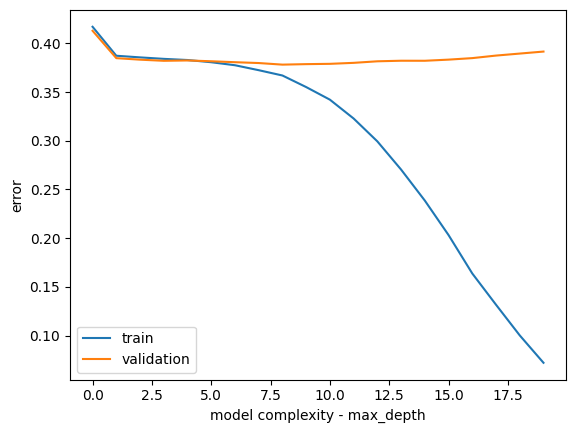

In [48]:
plt.plot(train_error, label="train")
plt.plot(val_error, label="validation")
plt.xlabel("model complexity - max_depth")
plt.ylabel("error")
plt.legend()
plt.show()

sklearn提供的randomforest model可以透過呼叫feature_importances_來檢視給個features的重要性

可以看到在randomforest中，前三重要的features為：

1. SHOT_DIST

2. PTS_TYPE

3. SHOT_CLOCK



In [49]:
model = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=0)
model.fit(X_train, y_train)
feature_importance=model.feature_importances_
df = pd.DataFrame([np.array(feature_importance)], columns=(feature_name))
print(df)

   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0  0.0064    0.011876    0.137762  0.038186    0.101006   0.428707  0.167629   

   CLOSE_DEF_DIST  
0        0.108433  


而單純用SHOT_DIST, PTS_TYPE, SHOT_CLOCK這三個features進行訓練

發現結果不會下降太多, acc只下降了約0.06

In [50]:
new_X_train = []
new_X_val = []
new_X_train.append(X_train[:,5])
new_X_train.append(X_train[:,6])
new_X_train.append(X_train[:,2])
new_X_val.append(X_val[:,5])
new_X_val.append(X_val[:,6])
new_X_val.append(X_val[:,2])
new_X_train = np.array(new_X_train).transpose()
new_X_val = np.array(new_X_val).transpose()
model = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=0)
model.fit(new_X_train, y_train)
print("acc: ",model.score(new_X_val, y_val))

acc:  0.6122599704579025


# Other models
除了randomforest之外

我還有嘗試了sklearn的其他models:

1. MLP
2. GradientBoosting
3. LogisticRegression
4. AdaBoost

而這些models的performance其實randomforest都差不多

In [51]:
model = MLPClassifier(random_state=0, solver='adam', activation='relu', momentum=0.9, alpha=1e-4,
                    learning_rate='adaptive' ,max_iter=150, shuffle=True)
model.fit(X_train, y_train)
print("acc: ",model.score(X_val, y_val))

acc:  0.6176241934229962


In [52]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
model.fit(X_train, y_train)
print("acc: ",model.score(X_val, y_val))

acc:  0.6184793594029386


In [53]:
model = LogisticRegression(random_state=0) 
model.fit(X_train, y_train)
print("acc: ",model.score(X_val, y_val))

acc:  0.6071289745782477


In [54]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
print("acc: ",model.score(X_val, y_val))

acc:  0.6181683899556869


# report

## 1. How you evaluate your model.

我所使用的sklearn都有model.fit()的功能,

可以去評估model在data上的表現

而我從最一開始的X_train當中，分出3成作為validation data

並以validation data作為評估各個model的標準

## 2. All models you have tried and the corresponding results.

已在上面實現。

## 3. Plot the error curve of your best model and tell if it is over-fit or not.

已在上面實現。

## 4. The top-3 features you find and how you find it .

已在上面實現。

## 5. A brief report what you do in this assignment.

首先將原始data進行normalization，並將data視覺化

再將一開始的X_train分出3成作為validation data，作為評估各個model的標準

嘗試不同的model，並針對randomforest進行error curve的畫製，確保不會出現overfitting的狀況

再依靠sklearn提供的model.feature_importances_此function，找出前三重要的feature

並發現單純用這三種features對randomfores進行訓練，並不會跟原本用八種features訓練的結果差太多

# Make prediction for testing data

In [68]:
predict = model.predict(X_test)
predict = pd.DataFrame(predict, columns=["FGM"])
predict.to_csv('Lab05_108062313_y_pred.csv', index=False) 